In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [4]:
len(df)

11914

In [5]:
df.shape

(11914, 16)

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


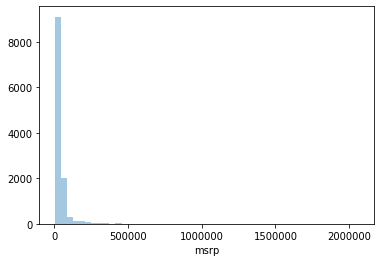

In [10]:
#смотрим на дистрибуцию нашей главной фичи - y
sns.distplot(df.msrp, kde=False)

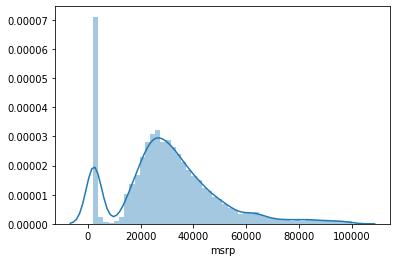

In [11]:
sns.distplot(df.msrp[df.msrp < 100000])

In [12]:
log_price = np.log1p(df.msrp)

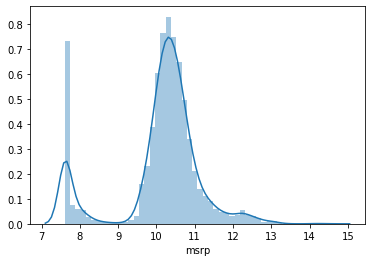

In [13]:
sns.distplot(log_price)

In [14]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [15]:
#splitting data into validation, test and training sets
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [16]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [17]:
#из-за дыр и хвоста повторяем то же для этих трех кусков датасета
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [18]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']
#удаляем чтобы случайно не использовать в самом файле тренинговым

In [19]:
#w0 = bias is the price we would predict if we knew shit about our data
#this is our baseline

In [20]:
def linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0]) # A
    X = np.column_stack([ones, X]) # B
    # normal equation formula
    XTX = X.T.dot(X) # C
    XTX_inv = np.linalg.inv(XTX) # D
    w = XTX_inv.dot(X.T).dot(y) # E
    return w[0], w[1:] # F

#A Create an array that contains only 1s.
#B Add the array of 1s as the first column of X.
#C Compute X T X .
#D Compute the inverse of X T X .
#E Compute the rest of the normal equation.
#F Split the weights vector into the bias and the rest of the weights.

In [21]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [22]:
#fill NA values with zeros
df_num = df_num.fillna(0)

In [23]:
df_num.isna().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [24]:
df_num.shape

(7150, 5)

In [25]:
#convert dataframe to array
X_train = df_num.values

In [26]:
X_train.shape

(7150, 5)

In [27]:
w_0, w = linear_regression(X_train, y_train)

In [28]:
y_pred = w_0 + X_train.dot(w)

In [29]:
#plot predicted values and compare them with the actual prices:

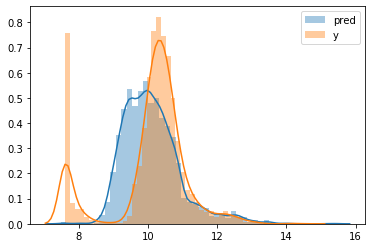

In [30]:
sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='y')
plt.legend()

In [31]:
def rmse(y, y_pred):
    error = y_pred - y # A
    mse = (error ** 2).mean() # B
    return np.sqrt(mse) # C

In [32]:
rmse(y_train, y_pred)

0.7554192603920133

In [33]:
#preparing the validation set

In [34]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [35]:
y_pred = w_0 + X_val.dot(w)

In [36]:
rmse(y_val, y_pred)

0.7616530991301607

In [39]:
# train the model
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)
# apply it to validation dataset to check RMSE
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 58.185419582298024


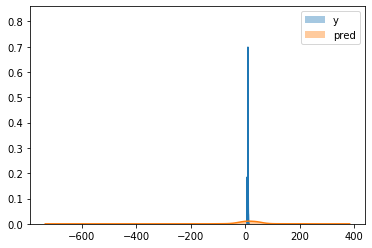

In [40]:
sns.distplot(y_val, label='y')
sns.distplot(y_pred, label='pred')
plt.legend()

In [41]:
df['make'].value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
mclaren             5
alfa_romeo          5
spyker    

In [42]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation: ', rmse(y_val, y_pred))

validation:  58.185419582298024


In [43]:
#adding more features
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)','flex-fuel_(unleaded/e85)']: #A
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    for v in ['automatic', 'manual', 'automated_manual']: #B
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']: #C
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
    for v in ['crossover', 'flex_fuel', 'luxury','luxury,performance', 'hatchback']: #D
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
    for v in ['compact', 'midsize', 'large']: #E
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible','4dr_hatchback']: #F
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

*#A Encode the type variable.
#B Encode the transmission variable.
#C Encode the number of driven wheels.
#D Encode the market category.
#E Encode the size.
#F Encode the style.*

In [44]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 58.185419582298024


In [45]:
#добавляем регуляризацию здесь и строит Ридж регрессию
def ridge(X,y,r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0],w[1:]

In [46]:
#checking different params of r:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = ridge(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -6129079172378031.00, 4.97, 6129079172384104.00
0.001, 7.19, -0.10, 1.82
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [48]:
X_train = prepare_X(df_train)
w_0, w = ridge(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.46022676361714343


In [51]:
#running grid_search to find best R
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = ridge(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.46022547859246105
0.0001 0.46022548605491187
 0.001 0.46022676361714343
  0.01 0.4602394963098567
   0.1 0.46037006957837506
     1 0.4618298042650018
     5 0.4684079627533056
    10 0.47572481006924155


In [52]:
X_train = prepare_X(df_train)
w_0, w = ridge(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.4602394963098567
test: 0.45718136795434006


In [53]:
#testing hypothetical scenario in which our user posts a car ad and we are predicting its price
ad = {
'city_mpg': 18,
'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'toyota',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2031,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2013
}

In [54]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [56]:
X_test

array([[2.680e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]])

In [57]:
y_pred = w_0 + X_test.dot(w)

In [59]:
suggestion = np.expm1(y_pred)
suggestion

array([28294.1359183])